# ECS7006 Music Informatics - Week 2 Tutorial

## Complex numbers

Assuming a complex number $c=a+ib$ with real part $\textrm{Re}(c)=a$ and imaginary part $\textrm{Im}(c)=b$, this can be written in python as:

In [7]:
a=0.8
b=2.0
c = a + b*1j

(note that a coefficient before $j$ is needed)

numpy supports basic processing of complex numbers:

In [8]:
import numpy as np

print(np.real(c)) # real part
print(np.imag(c)) # imaginary part
print(np.abs(c)) # absolute value
print(np.angle(c)) # angle in radians
print(np.conj(c)) # conjugate

0.8
2.0
2.1540659228538015
1.1902899496825317
(0.8-2j)


## Discrete Fourier Transform (DFT)

DFT definition:
\begin{equation}
  X(k) = \sum_{n=0}^{N-1}x(n)\exp(-2\pi i k n/N)\nonumber
\end{equation}

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-827995988.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.title('$\mathrm{Re}(\mathrm{DFT}_N)$')
/tmp/ipython-input-827995988.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.title('$\mathrm{Im}(\mathrm{DFT}_N)$')


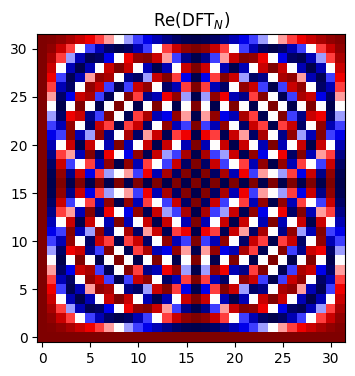

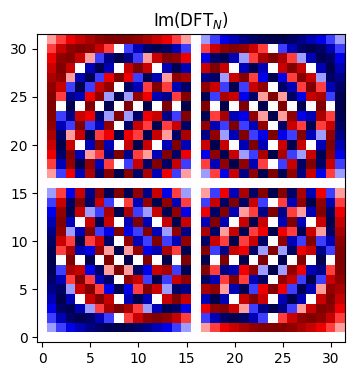

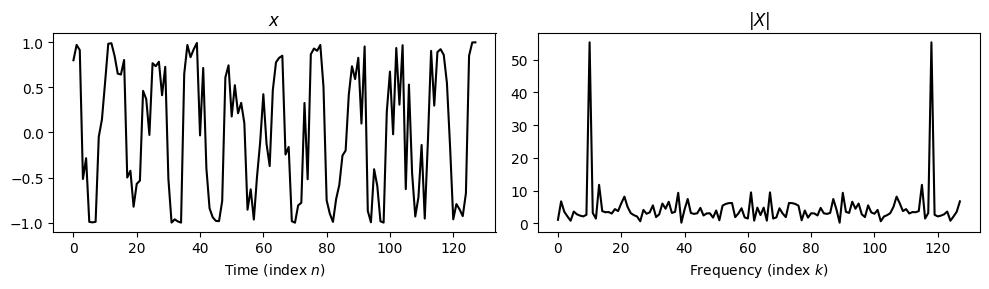

In [9]:
#Generate a DFT matrix (N: Number of samples, K: Number of frequency bins)
def generate_matrix_dft(N, K):
    dft = np.zeros((K, N), dtype=np.complex128)
    for n in range(N):
        for k in range(K):
            dft[k, n] = np.exp(-2j * np.pi * k * n / N)
    return dft

# Plot example matrix
from matplotlib import pyplot as plt
N = 32
dft_mat = generate_matrix_dft(N, N)
plt.figure(figsize=(12, 4))
plt.imshow(np.real(dft_mat), origin='lower', cmap='seismic', aspect='equal')
plt.title('$\mathrm{Re}(\mathrm{DFT}_N)$')
plt.figure(figsize=(12, 4))
plt.imshow(np.imag(dft_mat), origin='lower', cmap='seismic', aspect='equal')
plt.title('$\mathrm{Im}(\mathrm{DFT}_N)$')

# DFT function
def dft(x):
    x = x.astype(np.complex128)
    N = len(x)
    dft_mat = generate_matrix_dft(N, N)
    return np.dot(dft_mat, x)

# Example DFT
N = 128
n = np.arange(N)
k = 10
x = np.cos(2 * np.pi * (k * n / N) + 2 * (np.random.rand(N) - 0.5))
X = dft(x)

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('$x$')
plt.plot(x, 'k')
plt.xlabel('Time (index $n$)')

plt.subplot(1, 2, 2)
plt.title('$|X|$')
plt.plot(np.abs(X), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()


## Fast Fourier Transform (FFT)

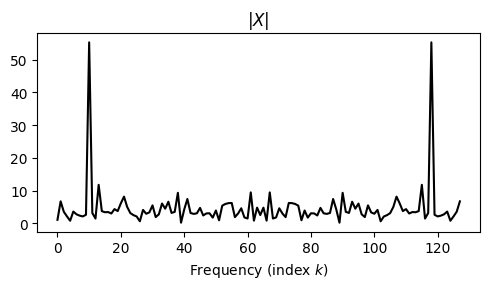

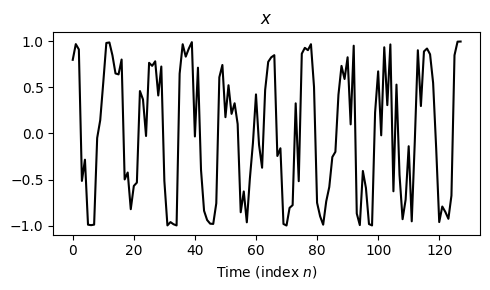

In [10]:
# numpy implementation of FFT
Xfft = np.fft.fft(x)

plt.figure(figsize=(5, 3))
plt.title('$|X|$')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()


# Inverse FFT
x_invfft = np.fft.ifft(Xfft)
plt.figure(figsize=(5, 3))
plt.title('$x$')
plt.plot(x, 'k')
plt.xlabel('Time (index $n$)')
plt.tight_layout()

## Windows

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

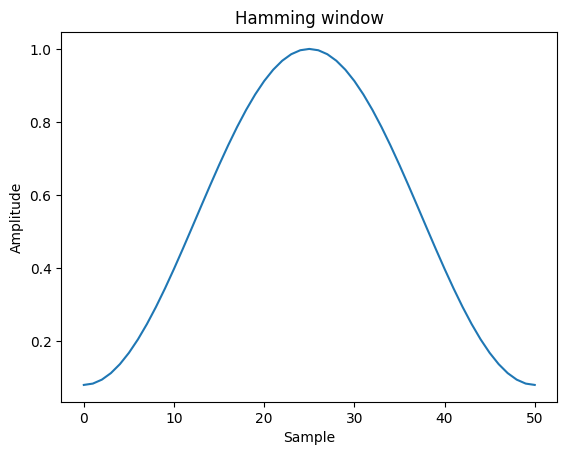

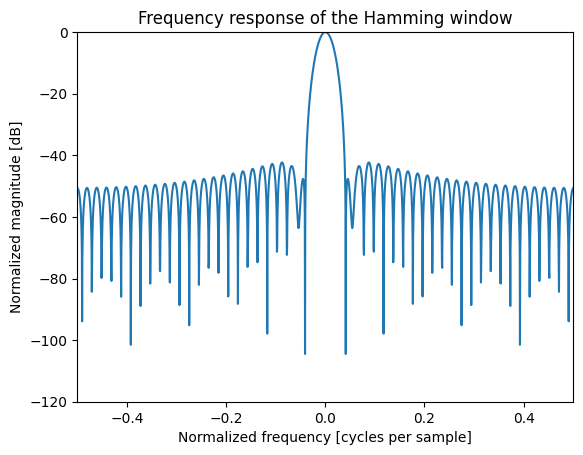

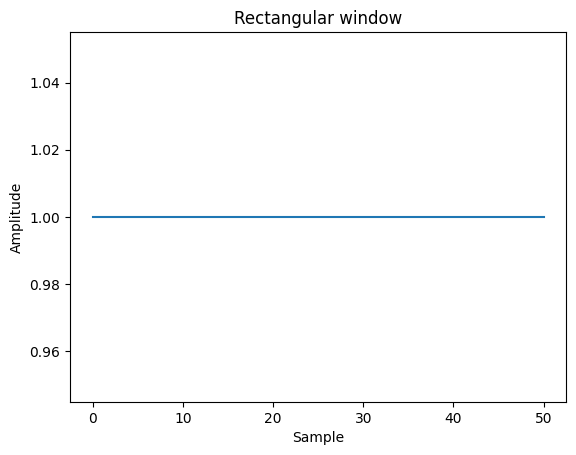

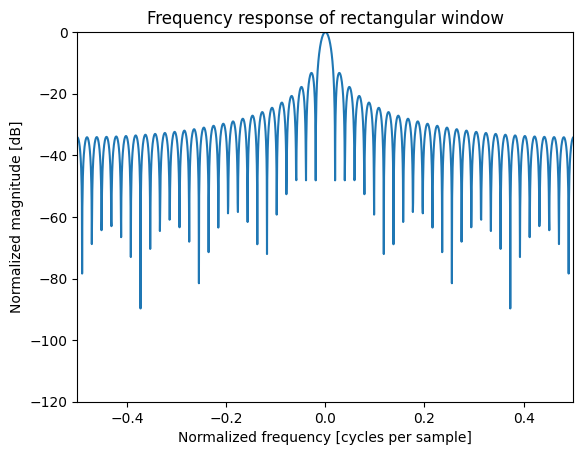

In [11]:
from scipy.signal import windows
from matplotlib import pyplot as plt
import numpy as np

# Hamming window
window = windows.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

# Frequency response of Hamming window
plt.figure()
A = np.fft.fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

# Rectangular window
window = windows.boxcar(51)
plt.figure()
plt.plot(window)
plt.title("Rectangular window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

# Frequency response of Rectangular window
plt.figure()
A = np.fft.fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(np.fft.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of rectangular window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

## Short-Time Fourier Transform (STFT)

Basic STFT implementation:

In [12]:
def stft_basic(x, w, H):
# x: input signal; w: window; H: hopsize
    N = len(w)
    L = len(x)
    M = np.floor((L - N) / H).astype(int)
    X = np.zeros((N, M + 1), dtype='complex')
    for m in range(M + 1):
        x_win = x[m * H:m * H + N] * w
        X_win = np.fft.fft(x_win)
        X[:, m] = X_win
    K = (N + 1) // 2
    X = X[:K, :]
    return X

Text(0.5, 0, 'Time (seconds)')

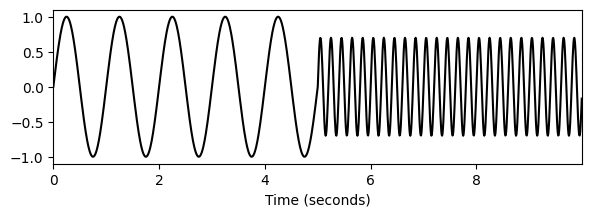

In [13]:
# Example signal
Fs = 128
duration = 10
omega1 = 1
omega2 = 5

N = int(duration * Fs)
t = np.arange(N) / Fs
t1 = t[:N//2]
t2 = t[N//2:]
x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)
x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)
x = np.concatenate((x1, x2))

plt.figure(figsize=(15, 2))
plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')

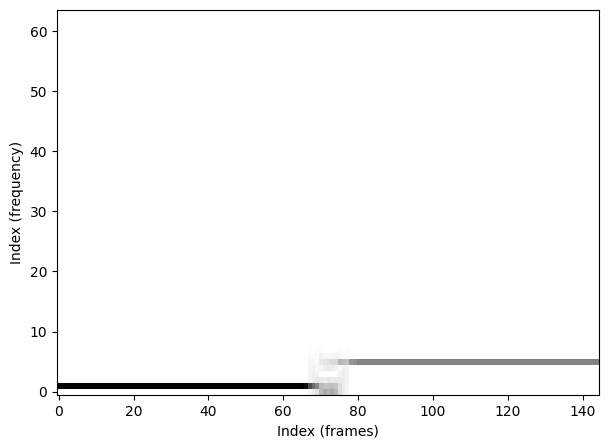

In [14]:
# Compute STFT for above signal
H = 8
N = 128
w = np.ones(N)
X = stft_basic(x, w, H)
Y = np.abs(X) ** 2

plt.figure(figsize=(7, 5))
plt.imshow(Y, origin='lower', aspect='auto', cmap='gray_r')
plt.xlabel('Index (frames)')
plt.ylabel('Index (frequency)');

### Spectrograms in librosa:

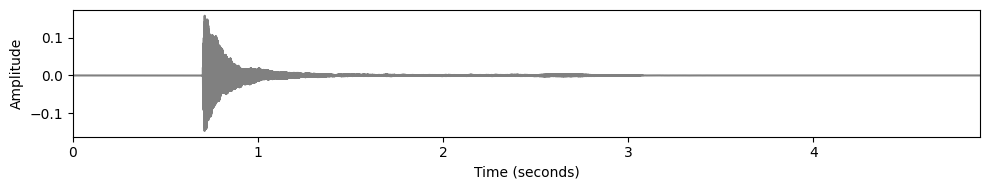

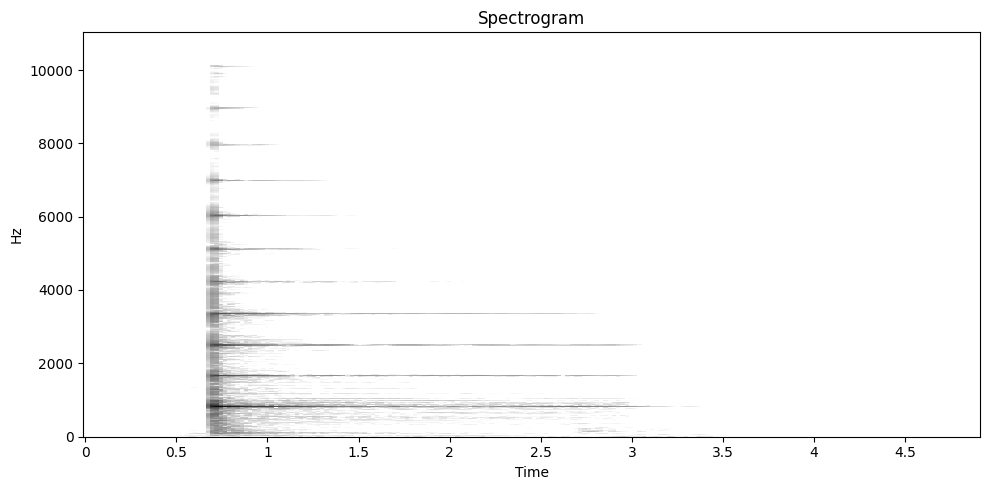

In [18]:
import os
import librosa
import librosa.display
import IPython.display as ipd

# Load and plot audio example
ipd.display(ipd.Audio(filename=os.path.join('MAPS_ISOL_NO_F_S1_M80_AkPnBcht.wav')))
y, sr = librosa.load(os.path.join('MAPS_ISOL_NO_F_S1_M80_AkPnBcht.wav'))
t = np.arange(y.shape[0]) / sr
plt.figure(figsize=(10, 2))
plt.plot(t, y, color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t[0], t[-1]])
plt.tight_layout()


# Compute and plot STFT
D = np.abs(librosa.stft(y,n_fft=2048,window='hann',win_length=2048,hop_length=512))
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='linear', x_axis='time',cmap='gray_r')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

Log-frequency spectrogram:

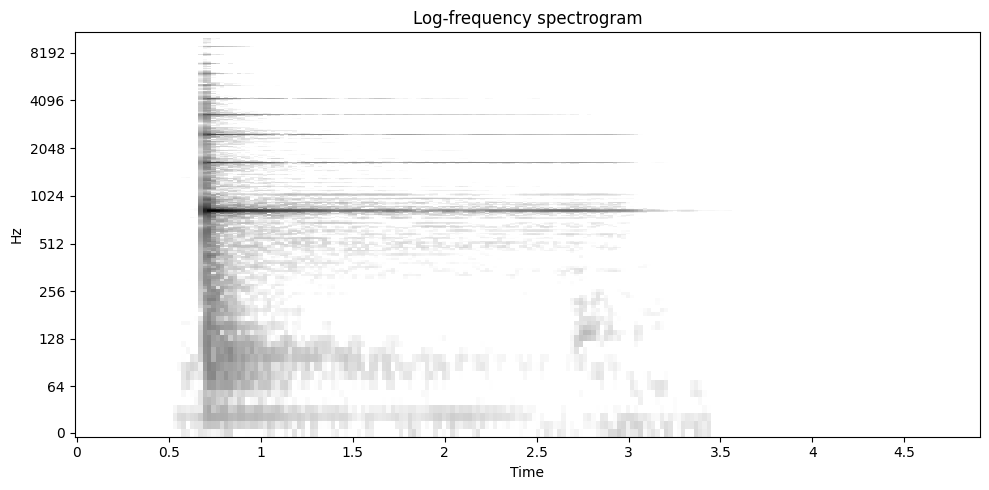

In [19]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time',cmap='gray_r')
plt.title('Log-frequency spectrogram')
plt.tight_layout()
plt.show()

## Constant-Q Transform Spectrogram

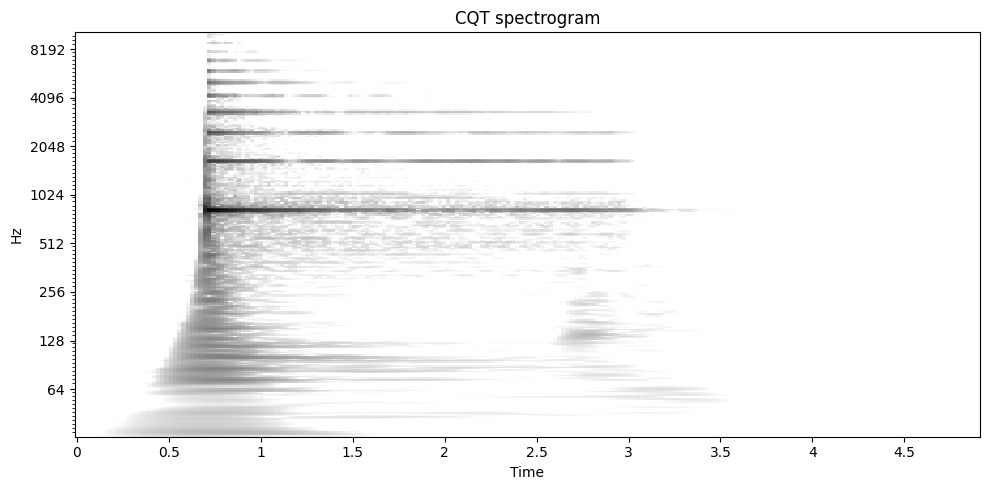

In [20]:
bins_per_octave = 36
C = np.abs(librosa.cqt(y, sr=sr, n_bins=300, bins_per_octave=bins_per_octave))
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_hz', bins_per_octave=bins_per_octave,cmap='gray_r')
plt.title('CQT spectrogram')
plt.tight_layout()
plt.show()

## Mel Spectrogram

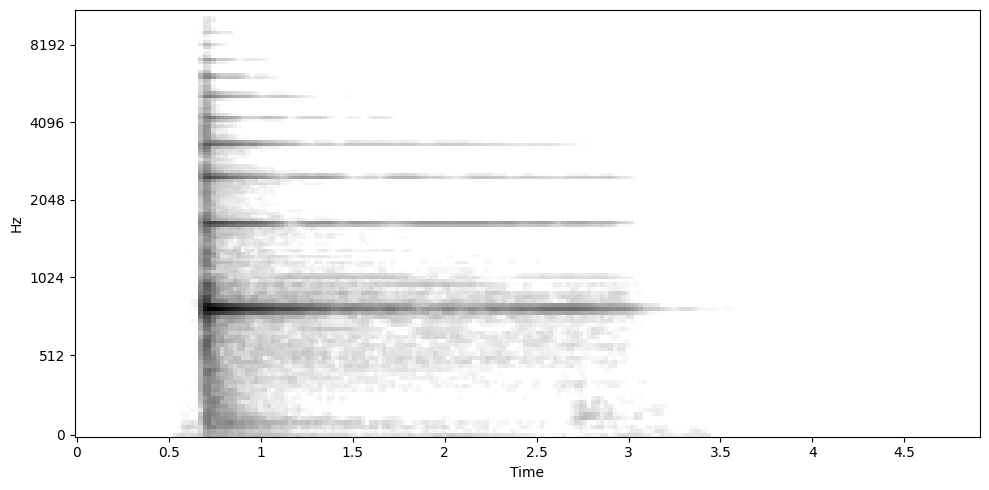

In [21]:
D = np.abs(librosa.stft(y))
S = librosa.feature.melspectrogram(S=D, sr=sr) # 128 mel filters by default
S_dB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_dB,y_axis='mel', x_axis='time',cmap='gray_r')
plt.tight_layout()
plt.show()